In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# --- load data --- #
df = pd.read_csv("../data/milestone2/baseline_train.csv")
df.head()

,distance_from_net,shot_angle,empty_net,is_goal
0,12.206556,55.007980,0,0
1,53.000000,31.890792,0,0
2,38.948684,48.122130,0,0
3,27.658633,12.528808,0,0
4,67.230945,30.379126,0,0


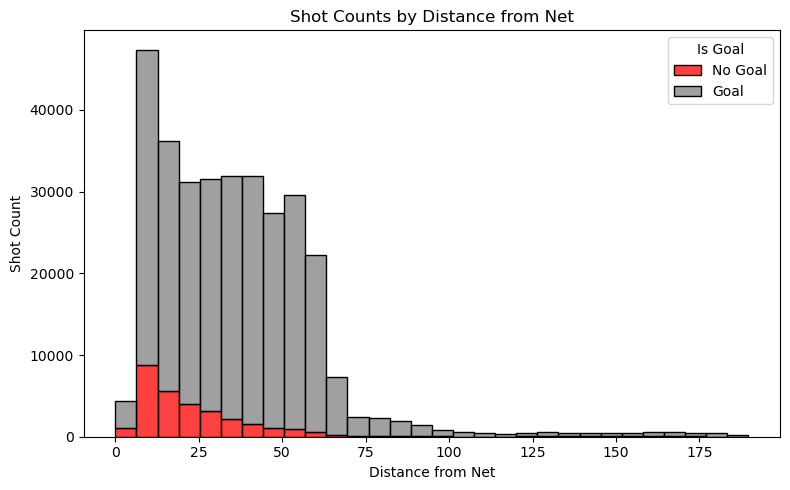

In [7]:
def distance_histograms(df, bins=30):
    """
    Plots histogram of shot counts (goals vs no-goals) binned by distance_from_net.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing columns 'distance_from_net' and 'is_goal'
        bins (int): Number of bins to use in the histogram
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=df,
        x="distance_from_net",
        hue="is_goal",
        bins=bins,
        kde=False,
        multiple="stack",
        palette={0: "gray", 1: "red"}
    )
    plt.title("Shot Counts by Distance from Net")
    plt.xlabel("Distance from Net")
    plt.ylabel("Shot Count")
    plt.legend(title="Is Goal", labels=["No Goal", "Goal"])
    plt.tight_layout()
    plt.show()
distance_histograms(df,30)

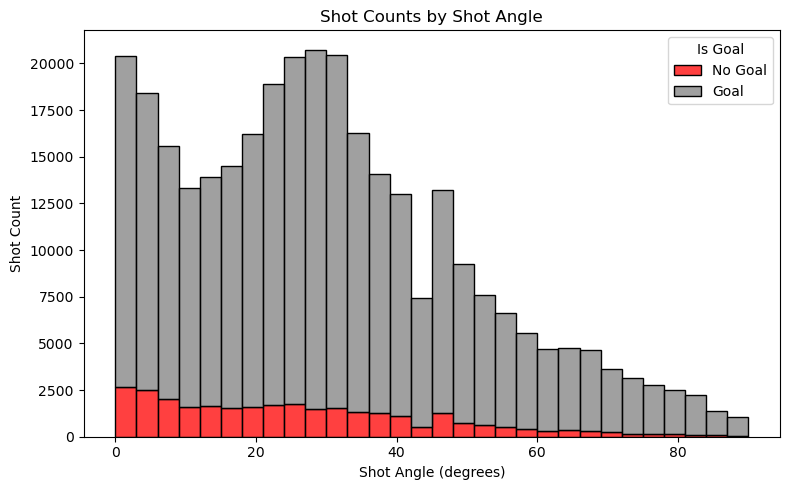

In [8]:
def angle_histograms(df, bins=30):
    """
    Plots histogram of shot counts (goals vs no-goals) binned by shot_angle.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing columns 'shot_angle' and 'is_goal'
        bins (int): Number of bins to use in the histogram
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=df,
        x="shot_angle",
        hue="is_goal",
        bins=bins,
        kde=False,
        multiple="stack",
        palette={0: "gray", 1: "red"}
    )
    plt.title("Shot Counts by Shot Angle")
    plt.xlabel("Shot Angle (degrees)")
    plt.ylabel("Shot Count")
    plt.legend(title="Is Goal", labels=["No Goal", "Goal"])
    plt.tight_layout()
    plt.show()
shotcount_per_angle(df,30)

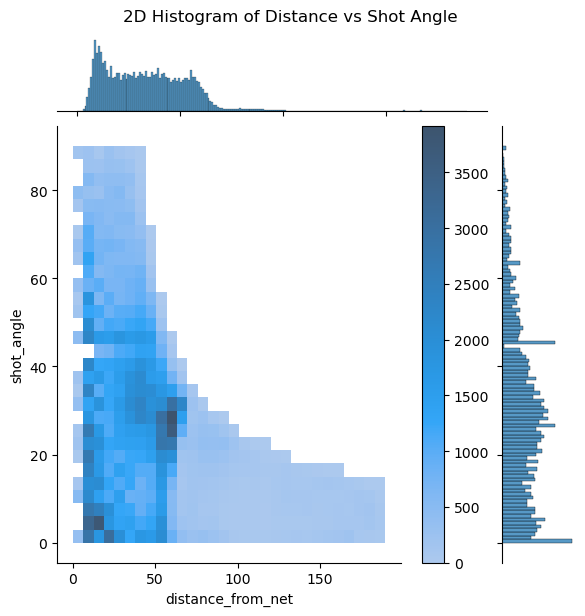

In [35]:
def distance_angle_histogram(df, bins=30):
    """
    Plots a 2D histogram (joint distribution) of distance_from_net vs shot_angle.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing 'distance_from_net' and 'shot_angle'
        bins (int): Number of bins for the 2D histogram
    """
    g = sns.jointplot(
        data=df,
        x="distance_from_net",
        y="shot_angle",
        kind="hist",
        bins=bins,
        cbar=True
    )
    g.fig.suptitle("2D Histogram of Distance vs Shot Angle", y=1.02)
    plt.show()
distance_angle_histogram(df,30)

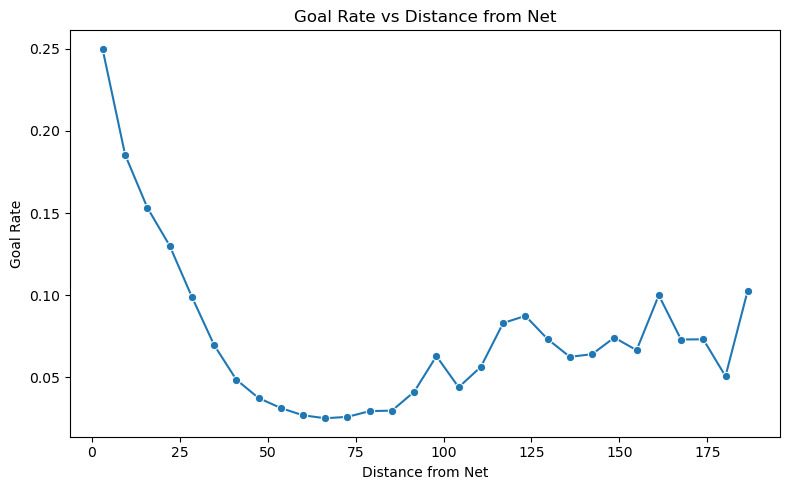

In [38]:
def goalrate_distance(df, bins=30):
    """
    Plots goal rate (#goals / total shots) as a function of distance_from_net.
    """
    df["distance_bin"] = pd.cut(df["distance_from_net"], bins=bins)
    goal_rate = df.groupby("distance_bin", observed=False)["is_goal"].mean().reset_index()
    goal_rate["distance_center"] = goal_rate["distance_bin"].apply(lambda x: x.mid)

    plt.figure(figsize=(8, 5))
    sns.lineplot(data=goal_rate, x="distance_center", y="is_goal", marker="o")
    plt.title("Goal Rate vs Distance from Net")
    plt.xlabel("Distance from Net")
    plt.ylabel("Goal Rate")
    plt.tight_layout()
    plt.show()
goalrate_distance(df,30)

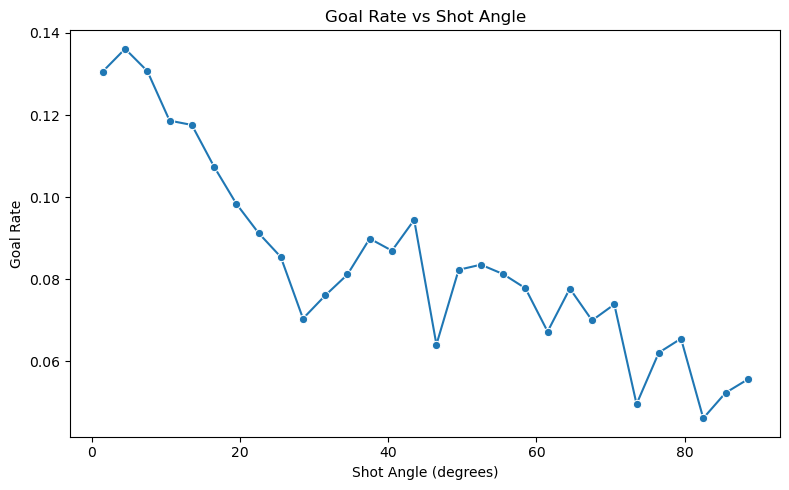

In [41]:
def goalrate_angle(df, bins=30):
    """
    Plots goal rate (#goals / total shots) as a function of shot_angle.
    """
    df["angle_bin"] = pd.cut(df["shot_angle"], bins=bins)
    goal_rate = df.groupby("angle_bin", observed=False)["is_goal"].mean().reset_index()
    goal_rate["angle_center"] = goal_rate["angle_bin"].apply(lambda x: x.mid)

    plt.figure(figsize=(8, 5))
    sns.lineplot(data=goal_rate, x="angle_center", y="is_goal", marker="o")
    plt.title("Goal Rate vs Shot Angle")
    plt.xlabel("Shot Angle (degrees)")
    plt.ylabel("Goal Rate")
    plt.tight_layout()
    plt.show()
goalrate_angle(df,30)

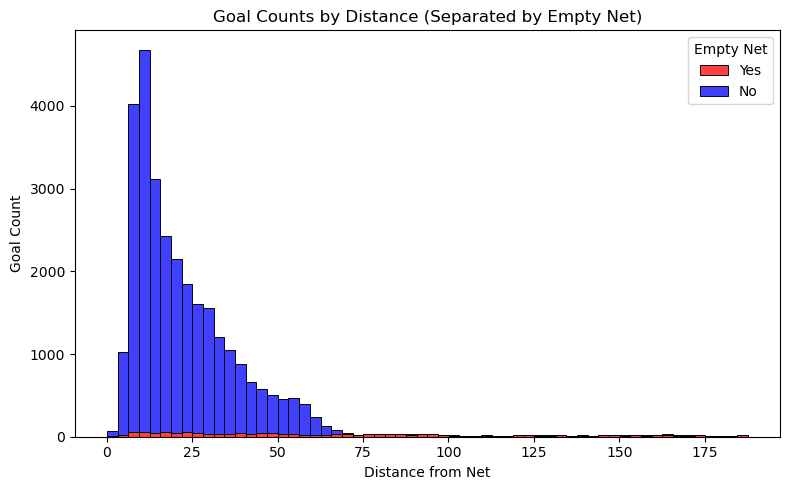

In [19]:
def goals_distance(df, bins=30):
    """
    Plots histogram of goal counts binned by distance_from_net,
    separated by empty_net condition.
    
    Parameters:
        df (pd.DataFrame): DataFrame with columns 'distance_from_net', 'is_goal', and 'empty_net'
        bins (int): Number of bins to use
    """
    # Filter only goal events
    goals = df[df["is_goal"] == 1]
    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=goals,
        x="distance_from_net",
        hue="empty_net",
        bins=bins,
        kde=False,
        multiple="stack",
        palette={0: "blue", 1: "red"}
    )
    plt.title("Goal Counts by Distance (Separated by Empty Net)")
    plt.xlabel("Distance from Net")
    plt.ylabel("Goal Count")
    plt.legend(title="Empty Net", labels=["Yes", "No"])
    plt.tight_layout()
    plt.show()
df["empty_net"] = df["empty_net"].astype(int)
goals_distance(df,60)

In [3]:
df = pd.read_csv("../data/tidy/all_seasons_combined.csv")
df["empty_net"].sum()

np.int64(0)

In [6]:
df["empty_net"] = df["goalie_name"].isna()
df["empty_net"].sum()

np.int64(3208)

In [10]:
df = pd.read_csv("../data/milestone2/advanced_train.csv")
empty_net_goals = df[(df["empty_net"]==True) & (df["is_goal"]==1)].shape[0]
guarded_net_goals = df[(df["empty_net"]==False) & (df["is_goal"]==1)].shape[0]
print(f"""
Goals on empty nets : {empty_net_goals}
Goals on guarded nets : {guarded_net_goals}
""")


Goals on empty nets : 1448
Goals on guarded nets : 28457

